In [26]:
## Importing Libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"
    # Local interactive view
    pio.renderers.default = "notebook"

In [27]:
##Importing Dataset
data = pd.read_csv("D:\Rohini Personal\Data Analysis\Projects Datasets\CLV using Python\customer_acquisition_data.csv")
print(data.head())

   customer_id           channel       cost  conversion_rate  revenue
0            1          referral   8.320327         0.123145     4199
1            2  paid advertising  30.450327         0.016341     3410
2            3   email marketing   5.246263         0.043822     3164
3            4      social media   9.546326         0.167592     1520
4            5          referral   8.320327         0.123145     2419


### 1) Distrribution of acquisition cost and revenue generated by the customer using histograms

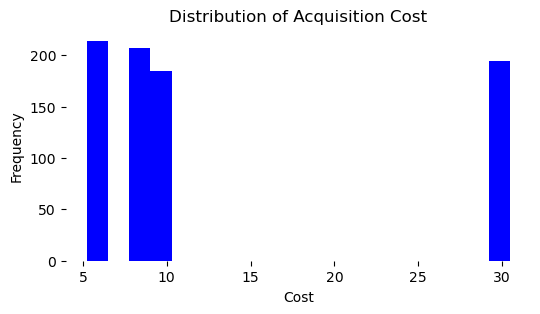

In [42]:
plt.figure(figsize=(6, 3))
plt.hist(data["cost"], bins=20,color = 'blue')
plt.title("Distribution of Acquisition Cost")
plt.xlabel("Cost")
plt.ylabel("Frequency")
plt.box(False)
plt.show()

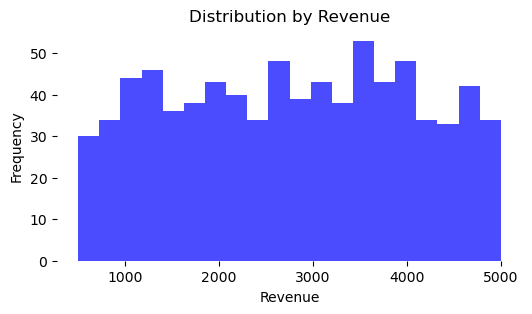

In [43]:
plt.figure(figsize=(6, 3))
plt.hist(data["revenue"], bins=20,color = 'blue', alpha=0.7)
plt.title("Distribution by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.box(False)
plt.show()

### 2)Comparision of acquisition across different channels and identify the most and least profitable channels

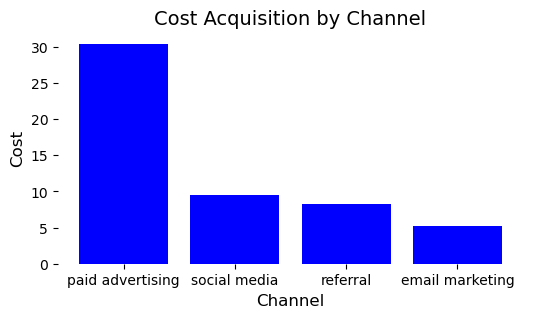

In [46]:
cost_by_channel = data.groupby('channel')['cost'].mean().reset_index().sort_values(by = 'cost', ascending = False)
plt.figure(figsize=(6, 3))
plt.bar(cost_by_channel['channel'], cost_by_channel['cost'], color = 'blue')
plt.title('Cost Acquisition by Channel', fontsize=14)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.box(False)
plt.show()

### 3)Channels effectiveness at converting customers

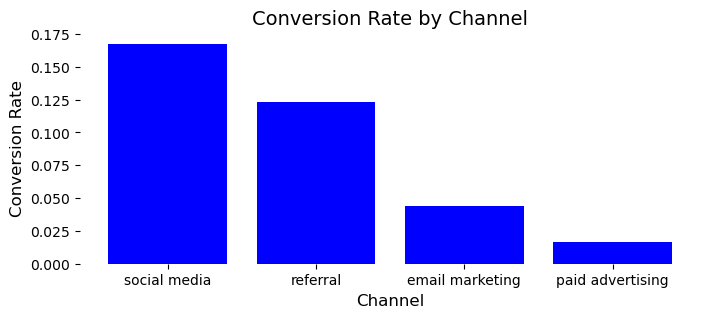

In [49]:
conversion_by_channel = data.groupby('channel')['conversion_rate'].mean().reset_index().sort_values(by = 'conversion_rate', ascending = False)
plt.figure(figsize=(8, 3))
plt.bar(conversion_by_channel['channel'], conversion_by_channel['conversion_rate'], color = 'blue')
plt.title('Conversion Rate by Channel', fontsize=14)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.box(False)
plt.show()

### 4)Total Revenue by Channel

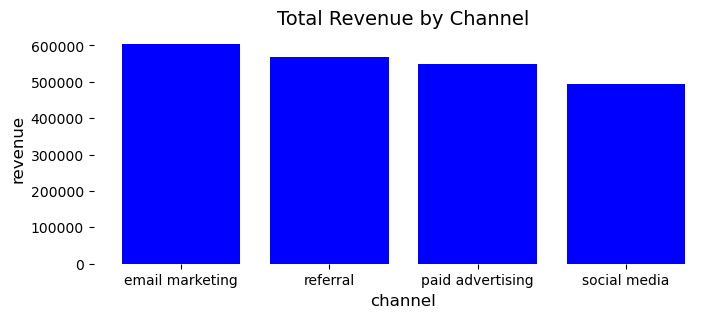

In [50]:
revenue_by_channel = data.groupby('channel')['revenue'].sum().reset_index().sort_values(by = 'revenue', ascending = False)
plt.figure(figsize=(8, 3))
plt.bar(revenue_by_channel['channel'], revenue_by_channel['revenue'], color = 'blue')
plt.title('Total Revenue by Channel', fontsize=14)
plt.xlabel('channel', fontsize=12)
plt.ylabel('revenue', fontsize=12)
plt.box(False)
plt.show()

### 4)Return of Investment(ROI) by Channel

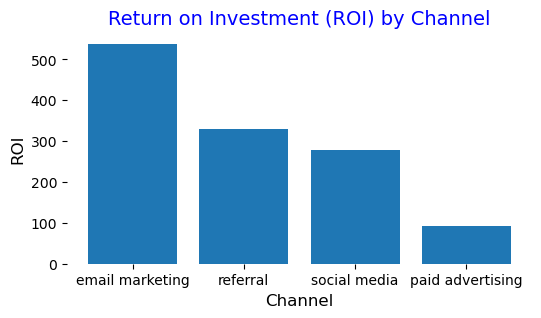

In [33]:
data['roi'] = data['revenue']/data['cost']
roi_by_channel = data.groupby('channel')['roi'].mean().reset_index().sort_values(by = 'roi', ascending = False)
plt.figure(figsize=(6, 3))
plt.bar(roi_by_channel['channel'], roi_by_channel['roi'], color = 'blue)
plt.title('Return on Investment (ROI) by Channel', fontsize=14')
plt.xlabel('Channel', fontsize=12)
plt.ylabel('ROI', fontsize=12)
plt.box(False)
plt.show()